# 5. Evaluation of Convolution Neural Network

In [1]:
# coding: utf-8
'''
    Initial setting. Please do not change this cell
'''
import sys, os
sys.path.append(os.pardir)  # Settings for importing files in parent directory
import numpy as np # Import numpy library
from dataset.mnist import load_mnist
from common.layers import *
from common.simple_convnet import SimpleConvNet
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False) # Read Test Data

## 5-1. Construction of convolution neural network
![alt](https://raw.githubusercontent.com/yoshihiroo/programming-workshop/master/deep_learning_jupyter/figure/WS000003.JPG)

## 5-2 Evaluation of accuracy

In [2]:
# Reading the convolution network and reading the trained parameters
network = SimpleConvNet()
network.load_params("/home/ubuntu/workshop/dataset/params.pkl")

# Evaluation of accuracy
print("calculating test accuracy ... ")
classified_ids = []
acc = 0.0
batch_size = 100

for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx)
    y = np.argmax(y, axis=1)
    classified_ids.append(y)
    acc += np.sum(y == tt)
    
acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

calculating test accuracy ... 
test accuracy:0.989


## 5-3 Look at the mistaken image in the test

======= misclassified result =======
{view index: (label, inference), ...}
{1: (3, 5), 2: (4, 2), 3: (2, 7), 4: (5, 3), 5: (9, 8), 6: (6, 0), 7: (8, 2), 8: (2, 7), 9: (6, 5), 10: (2, 0), 11: (6, 5), 12: (7, 2), 13: (9, 4), 14: (4, 9), 15: (9, 5), 16: (7, 1), 17: (8, 0), 18: (5, 3), 19: (1, 8), 20: (9, 4)}


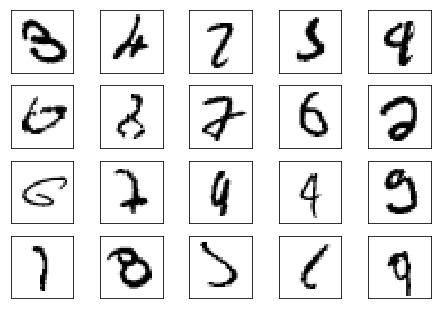

In [3]:
classified_ids = np.array(classified_ids)
classified_ids = classified_ids.flatten()
 
max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test):
    if not val:
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        mis_pairs[current_view] = (t_test[i], classified_ids[i])
            
        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()